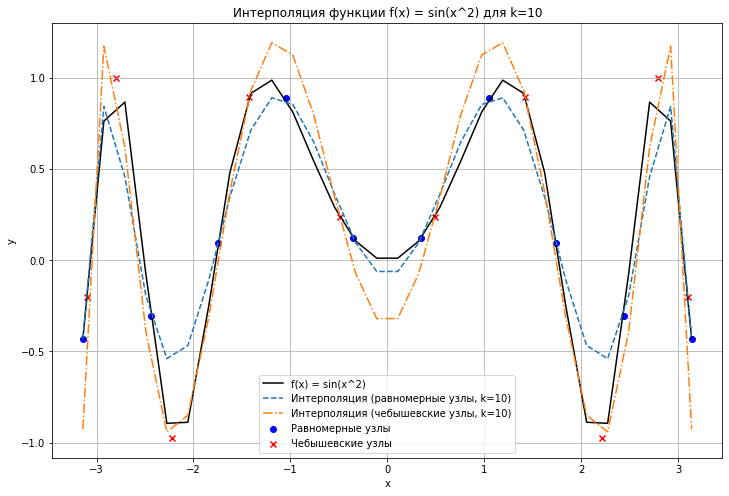

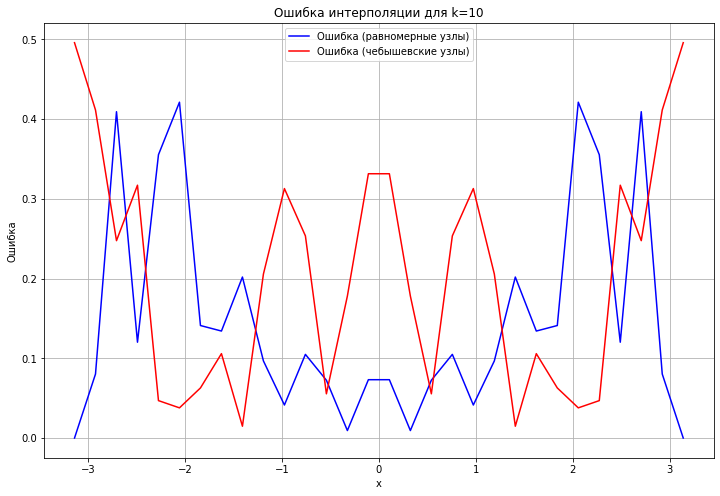

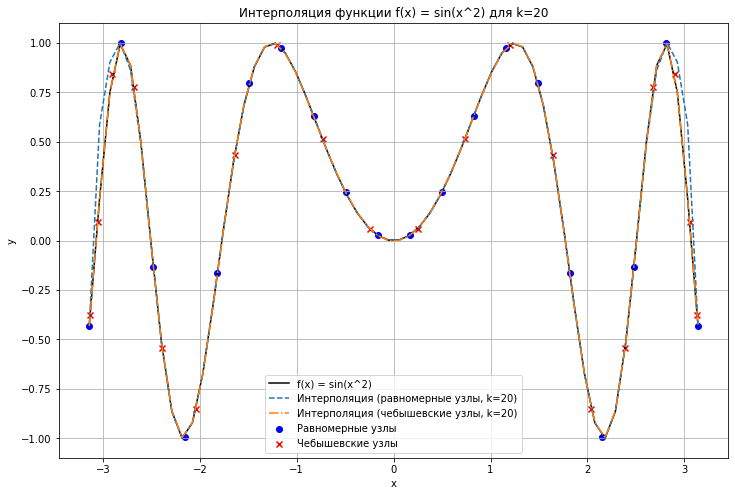

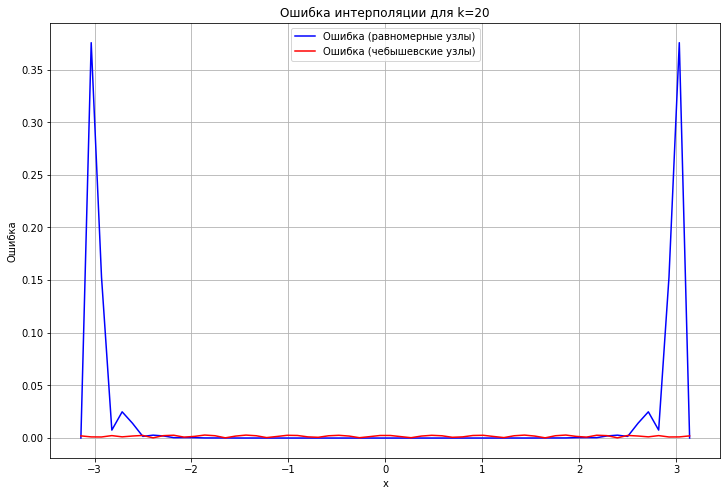

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Заданная функция
def f(x):
    return np.sin(x**2)

# Интерполяционный многочлен Лагранжа
def lagrange_interpolation(x, y, t):
    n = len(x)
    L = 0
    for i in range(n):
        li = 1
        for j in range(n):
            if i != j:
                li *= (t - x[j]) / (x[i] - x[j])
        L += y[i] * li
    return L

# Построение интерполяционного многочлена
def interpolate_and_plot(f, a, b, k, num_points):
    # Узлы интерполяции (равномерные)
    x_uniform = np.linspace(a, b, k)
    y_uniform = f(x_uniform)
    
    # Узлы интерполяции (чебышевские)
    x_chebyshev = np.cos((2 * np.arange(k) + 1) * np.pi / (2 * k))
    x_chebyshev = 0.5 * (a + b) + 0.5 * (b - a) * x_chebyshev
    y_chebyshev = f(x_chebyshev)
    
    # Точки для построения графиков
    t = np.linspace(a, b, num_points)
    f_values = f(t)
    
    # Интерполяция (равномерные узлы)
    L_uniform_values = [lagrange_interpolation(x_uniform, y_uniform, ti) for ti in t]
    
    # Интерполяция (чебышевские узлы)
    L_chebyshev_values = [lagrange_interpolation(x_chebyshev, y_chebyshev, ti) for ti in t]
    
    # Построение графиков
    plt.figure(figsize=(12, 8))
    plt.plot(t, f_values, label='f(x) = sin(x^2)', color='black')
    plt.plot(t, L_uniform_values, label=f'Интерполяция (равномерные узлы, k={k})', linestyle='--')
    plt.plot(t, L_chebyshev_values, label=f'Интерполяция (чебышевские узлы, k={k})', linestyle='-.')
    plt.scatter(x_uniform, y_uniform, color='blue', marker='o', label='Равномерные узлы')
    plt.scatter(x_chebyshev, y_chebyshev, color='red', marker='x', label='Чебышевские узлы')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Интерполяция функции f(x) = sin(x^2) для k={k}')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Вычисление и сравнение ошибок
    error_uniform = np.abs(f_values - L_uniform_values)
    error_chebyshev = np.abs(f_values - L_chebyshev_values)
    
    plt.figure(figsize=(12, 8))
    plt.plot(t, error_uniform, label='Ошибка (равномерные узлы)', color='blue')
    plt.plot(t, error_chebyshev, label='Ошибка (чебышевские узлы)', color='red')
    plt.xlabel('x')
    plt.ylabel('Ошибка')
    plt.title(f'Ошибка интерполяции для k={k}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Интервал [a, b] и начальное количество узлов k
a, b = -np.pi, np.pi
initial_k = 10

# Выполнение шагов 2-6 для различных количеств узлов
for k in [initial_k, 2 * initial_k]:
    interpolate_and_plot(f, a, b, k, 3 * k)


Я устал..